## Pre-processing textural data from social media



- access the API in Python
- query Twitter for key phrases
- customise the query
- join results from the query in a Pandas DataFrame
- apply some preprocessing.

##  Prepare your workstation

In [10]:
# Copy the YAML file and your Twitter keys over to this Jupyter Notebook before you start to work
import yaml
from yaml.loader import SafeLoader
from twitter import *

# Import the yaml file - remember to specify the whole path and use / between directories
twitter_creds = yaml.safe_load(open('twitter.yaml', 'r').read())

In [11]:
# Pass your twitter credentials
twitter_api = Twitter(auth=OAuth(twitter_creds['access_token'],
                                 twitter_creds['access_token_secret'], 
                                 twitter_creds['api_key'],
                                 twitter_creds['api_secret_key'] ))

In [12]:
# See if you are connected
print(twitter_api)

In [13]:
# Run a test with #python
python_tweets = twitter_api.search.tweets(q="#python")

# View output
print(python_tweets)

{'statuses': [{'created_at': 'Fri Jun 10 10:32:51 +0000 2022', 'id': 1535208364753358851, 'id_str': '1535208364753358851', 'text': 'RT @iambickky: JavaScript is Hard!\nPython is Hard!\nCSS is Hard!\nWhole Programming is Hard !!\nYes, everything will be hard at first, but it…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'iambickky', 'name': 'Bickky | FullStack Developer', 'id': 1376901020052168704, 'id_str': '1376901020052168704', 'indices': [3, 13]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 801448633417797633, 'id_str': '801448633417797633', 'name': 'Bidipta saikia', 'screen_name': 'bidipta_saikia', 'location': 'Guwahati, Indi

## 1. Test connection

In [14]:
# Query the term cheesecake
q = {'q':'cheesecake', 'count':100, 'result_type':'recent'}
results = []

while len(results) < 30:
    query = twitter_api.search.tweets(**q)
    q['max_id'] = query['search_metadata']['next_results'].split('&')[0].split('?max_id=')[1]
    results.append(query)
    
# Determine the number of results
len(results) 


30

## 2. Create DataFrames

In [15]:
# Import pandas to join the DataFrames
import pandas as pd

# Concat DataFrames
results_list_pd = pd.concat([pd.DataFrame(_['statuses']) for _ in results])

# View shape of output
results_list_pd.head()


,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Fri Jun 10 10:32:21 +0000 2022,1535208238442061827,1535208238442061827,Making strawberry cheesecake today 🍰😋 https://...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1535208223841697799, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,1,False,False,False,en,NaN,NaN,NaN,NaN
1,Fri Jun 10 10:32:14 +0000 2022,1535208207760564224,1535208207760564224,iced coffee ▫️ cheesecake ▫️notes▫️ https://t....,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1535208152479993857, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
2,Fri Jun 10 10:32:07 +0000 2022,1535208178992173059,1535208178992173059,ホームズ...ホームズほしい,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN
3,Fri Jun 10 10:32:04 +0000 2022,1535208168719953922,1535208168719953922,RT @janespatisserie: Summer Berry Cheesecake 🍓...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1512024765988581380, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,99,0,False,False,False,en,{'created_at': 'Thu Jun 09 17:00:01 +0000 2022...,NaN,NaN,NaN
4,Fri Jun 10 10:31:45 +0000 2022,1535208085723168768,1535208085723168768,RT @fgoproject: 【カルデア広報局より】\n6月10日(金)18:00より期間...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3111,0,False,False,NaN,ja,{'created_at': 'Fri Jun 10 09:10:47 +0000 2022...,NaN,NaN,NaN


In [18]:
# Determine values of output
results_list_values = results_list_pd['text'].values


## 3. Investigate tweets

In [19]:
# Import nltk and the required resources
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hamdihassan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Look at one raw tweet
results_list_values[1]

'iced coffee ▫️ cheesecake ▫️notes▫️ https://t.co/UTKsIGzGZV'

In [21]:
# Split up each tweet into individual words
results_list_values_token = [word_tokenize(_) for _ in results_list_values]

In [22]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
import nltk
nltk.download('words')

all_english_words = set(words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/hamdihassan/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [25]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words.

results_list_values_token_nostop =\
[[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words]\
 for x in results_list_values_token]

In [24]:
# Let's have a look at the same tweet as above
results_list_values_token_nostop[1]

['iced', 'coffee', 'cheesecake']

In [29]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hamdihassan/nltk_data...


True

In [30]:
# Import the vader classs and create a object of the analyzer called Darth Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia
darth_vader = SentimentIntensityAnalyzer()

In [31]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

results_list_values_token_nostop_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in results_list_values_token_nostop}

In [32]:
# Convert the list of dictionary results to a pandas dataframe. 
# The index is the cleaned tweet.
# We can see some of the highly positive words 

polarity_pd = pd.DataFrame(results_list_values_token_nostop_polarity).T

In [33]:
# Get the top 5 most positive cleaned tweets related to cheesecake
polarity_pd.sort_values('pos', ascending=0).head(5)

,neg,neu,pos,compound
hug,0.0,0.0,1.0,0.4767
truly,0.0,0.0,1.0,0.4404
definitely,0.0,0.0,1.0,0.4019
like,0.0,0.0,1.0,0.3612
cute,0.0,0.0,1.0,0.4588


In [34]:
# Get the top 5 most negative words related to cheesecake
polarity_pd.sort_values('neg', ascending=0).head(5)

,neg,neu,pos,compound
fear,1.000,0.000,0.0,-0.4939
crying,1.000,0.000,0.0,-0.4767
reckless,1.000,0.000,0.0,-0.4019
cheesecake disappointed lack,0.844,0.156,0.0,-0.6597
suck titty cheesecake dead ass,0.843,0.157,0.0,-0.8934


In [35]:
# The describe function on the compound will show the distribution and moments. 
# The average is 0.1 so slightly positive
polarity_pd['compound'].describe()

count    992.000000
mean       0.127494
std        0.346848
min       -0.932500
25%        0.000000
50%        0.000000
75%        0.386825
max        0.942300
Name: compound, dtype: float64

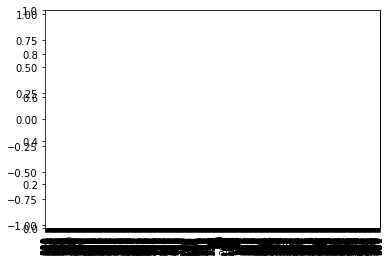

In [39]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

_plot = polarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind='bar')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

<AxesSubplot:>

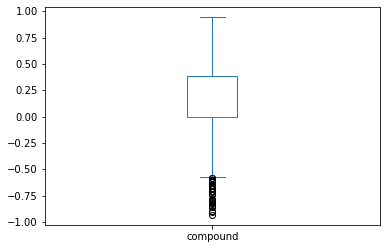

In [40]:
# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind='box')